In [12]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [13]:
from google.colab import files
uploaded = files.upload()


Saving taxi_trip_pricing.csv to taxi_trip_pricing.csv


In [14]:
data = pd.read_csv('taxi_trip_pricing.csv')


In [15]:
import pandas as pd


df = pd.read_csv('taxi_trip_pricing.csv')


df.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [34]:
X = df[['Trip_Distance_km']]  # Feature
Y = df['Trip_Price']  # Target

In [35]:
print(df[df.isnull().any(axis=1)])

     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
1               47.59   Afternoon     Weekday              1.0   
3               30.33     Evening     Weekday              4.0   
6                3.85   Afternoon     Weekday              4.0   
7               43.44     Evening     Weekend              3.0   
9               35.70   Afternoon     Weekday              2.0   
..                ...         ...         ...              ...   
988             13.07         NaN     Weekend              2.0   
993             25.83     Morning     Weekday              3.0   
996             45.95       Night     Weekday              4.0   
997              7.70     Morning     Weekday              3.0   
999             22.85     Morning     Weekend              3.0   

    Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
1                 High   Clear        NaN         0.62             0.43   
3                  Low     NaN       3.48         0.51   

print(df[df.isnull().any(axis=1)])



In [36]:
df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median())
df['Trip_Price'] = df['Trip_Price'].fillna(df['Trip_Price'].median())


In [37]:
print(df[df.isnull().any(axis=1)])


     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
1               47.59   Afternoon     Weekday              1.0   
3               30.33     Evening     Weekday              4.0   
6                3.85   Afternoon     Weekday              4.0   
7               43.44     Evening     Weekend              3.0   
9               35.70   Afternoon     Weekday              2.0   
..                ...         ...         ...              ...   
988             13.07         NaN     Weekend              2.0   
993             25.83     Morning     Weekday              3.0   
996             45.95       Night     Weekday              4.0   
997              7.70     Morning     Weekday              3.0   
999             22.85     Morning     Weekend              3.0   

    Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
1                 High   Clear        NaN         0.62             0.43   
3                  Low     NaN       3.48         0.51   

In [38]:
model = LinearRegression()


In [39]:
print("NaN values:\n", df.isnull().sum())

# Check for infinite values
print("Infinite values:\n", df.isin([float('inf'), float('-inf')]).sum())

# Identify rows with NaN or infinite values
invalid_rows = df[(df['Trip_Distance_km'].isnull()) |
                  (df['Trip_Distance_km'] == float('inf')) |
                  (df['Trip_Distance_km'] == float('-inf'))]
print("Rows with invalid values:\n", invalid_rows)


NaN values:
 Trip_Distance_km          0
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price                0
dtype: int64
Infinite values:
 Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64
Rows with invalid values:
 Empty DataFrame
Columns: [Trip_Distance_km, Time_of_Day, Day_of_Week, Passenger_Count, Traffic_Conditions, Weather, Base_Fare, Per_Km_Rate, Per_Minute_Rate, Trip_Duration_Minutes, Trip_Price]
Index: []


In [40]:
df.replace([float('inf'), float('-inf')], np.nan, inplace=True)

# Fill NaN (previously infinite) values with median
df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median())




In [41]:
print(df['Trip_Distance_km'].describe())

# Filter rows with extreme values
extreme_values = df[(df['Trip_Distance_km'] > 1e6) | (df['Trip_Distance_km'] < -1e6)]
print("Extreme values:\n", extreme_values)


count    1000.000000
mean       26.829071
std        18.428053
min         1.709993
25%        13.107500
50%        25.830000
75%        37.782500
max       116.196111
Name: Trip_Distance_km, dtype: float64
Extreme values:
 Empty DataFrame
Columns: [Trip_Distance_km, Time_of_Day, Day_of_Week, Passenger_Count, Traffic_Conditions, Weather, Base_Fare, Per_Km_Rate, Per_Minute_Rate, Trip_Duration_Minutes, Trip_Price]
Index: []


In [42]:
df['Trip_Distance_km'] = df['Trip_Distance_km'].clip(lower=df['Trip_Distance_km'].quantile(0.01),
                                                     upper=df['Trip_Distance_km'].quantile(0.99))



In [43]:
print("Remaining NaN values:", df['Trip_Distance_km'].isnull().sum())
print("Remaining infinite values:", df['Trip_Distance_km'].isin([float('inf'), float('-inf')]).sum())


Remaining NaN values: 0
Remaining infinite values: 0


In [44]:
model.fit(X,Y)


LinearRegression()

In [45]:
model.intercept_

9.805573855951266

In [46]:
model.coef_

array([1.74199047])

In [47]:
Y_pred = model.predict(X)

In [48]:
MSE = mean_squared_error(Y, Y_pred)
RMSE = np.sqrt(MSE)

In [49]:
print(f"Regression Line: Y = {model.coef_[0]}X + {model.intercept_}")
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {RMSE}")

Regression Line: Y = 1.7419904735937841X + 9.805573855951266
Mean Squared Error (MSE): 528.5932804734266
Root Mean Squared Error (RMSE): 22.991156571025883


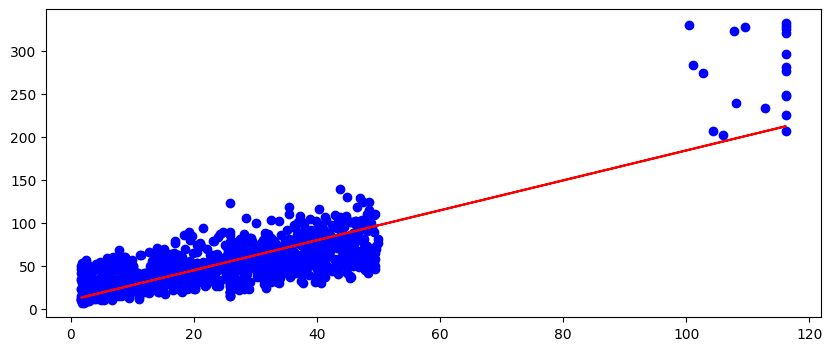

In [50]:
plt.figure(figsize=(10, 4))
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X, Y_pred, color="red", label="Regression Line")

In [53]:
plt.text(6, 60, f"MSE: {MSE:.3f}", fontsize=6, color="green", bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
plt.text(6, 57, f"RMSE: {RMSE:.3f}", fontsize=6, color="green", bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Labels and legend
plt.xlabel("Marketing Budget (in thousands)")
plt.ylabel("Sales Revenue (in thousands)")
plt.title("Linear Regression with Errors")
plt.legend()
plt.grid()
plt.show()

<ipython-input-53-3edad4124a65>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
